# Charting presidential age

## References:
* [Connected scatterplot in ggplot2](https://r-charts.com/correlation/connected-scatter-plot-ggplot2/)
* [Calculate age from dates](https://datacornering.com/how-to-calculate-age-in-r/)
* [geom_segment()](https://ggplot2.tidyverse.org/reference/geom_segment.html)

In [2]:
# Attach libraries we need
library(ggplot2)
library(lubridate)


Attachement du package : 'lubridate'


Les objets suivants sont masqu'es depuis 'package:base':

    date, intersect, setdiff, union




In [3]:
ps = read.csv('data/president_timelines.csv')

In [4]:
head(ps,3)

,Index,Name,Birth,Death,TermBegin,TermEnd
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,George Washington,22 February 1732,14 December 1799,30 April 1789,4 March 1797
2,2,John Adams,30 October 1735,4 July 1826,4 March 1797,4 March 1801
3,3,Thomas Jefferson,13 April 1743,4 July 1826,4 March 1801,4 March 1809


In [5]:
# Converting all date columns to date format
ps$Birth <- as.Date(ps$Birth, format = "%d %b %Y")
ps$Death <- as.Date(ps$Death, format = "%d %b %Y")
ps$TermBegin <- as.Date(ps$TermBegin, format = "%d %b %Y")
ps$TermEnd <- as.Date(ps$TermEnd, format = "%d %b %Y")

In [6]:
head(ps,3)

,Index,Name,Birth,Death,TermBegin,TermEnd
,<int>,<chr>,<date>,<date>,<date>,<date>
1,1,George Washington,1732-02-22,1799-12-14,1789-04-30,1797-03-04
2,2,John Adams,1735-10-30,1826-07-04,1797-03-04,1801-03-04
3,3,Thomas Jefferson,1743-04-13,1826-07-04,1801-03-04,1809-03-04


In [7]:
# Calculate age from dates: https://datacornering.com/how-to-calculate-age-in-r/
ps$InaugurationAge <- trunc((ps$Birth %--% ps$TermBegin) / years(1))
ps$EndTermAge <- trunc((ps$Birth %--% ps$TermEnd) / years(1))

In [8]:
head(ps)

,Index,Name,Birth,Death,TermBegin,TermEnd,InaugurationAge,EndTermAge
,<int>,<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>
1,1,George Washington,1732-02-22,1799-12-14,1789-04-30,1797-03-04,57,65
2,2,John Adams,1735-10-30,1826-07-04,1797-03-04,1801-03-04,61,65
3,3,Thomas Jefferson,1743-04-13,1826-07-04,1801-03-04,1809-03-04,57,65
4,4,James Madison,1751-03-16,1836-06-28,1809-03-04,1817-03-04,57,65
5,5,James Monroe,1758-04-28,1831-07-04,1817-03-04,1825-03-04,58,66
6,6,John Quincy Adams,1767-07-11,1848-02-23,1825-03-04,1829-03-04,57,61


In [9]:
# set graph dimensions
options(repr.plot.width=12, repr.plot.height=8)

[Reference: geom_segment lines in R](https://ggplot2.tidyverse.org/reference/geom_segment.html)

To plot the lines, we first create (x,y) coordinates by passing `TermBegin` and `InaugurationAge` vales into the main `ggplot()` function.

Then we use `geom_segment()` to draw a line from first (x,y) to additional set of coordinates, `xend` and `yend`. These coordinates are `TermEnd` and `EndTermAge`.

We also pass an arrow function to `geom_segment()`, and use `geom_point()` to put a point at the start of the line.

We then use `scale_x_date` to format the x axis with lines every 20 years.

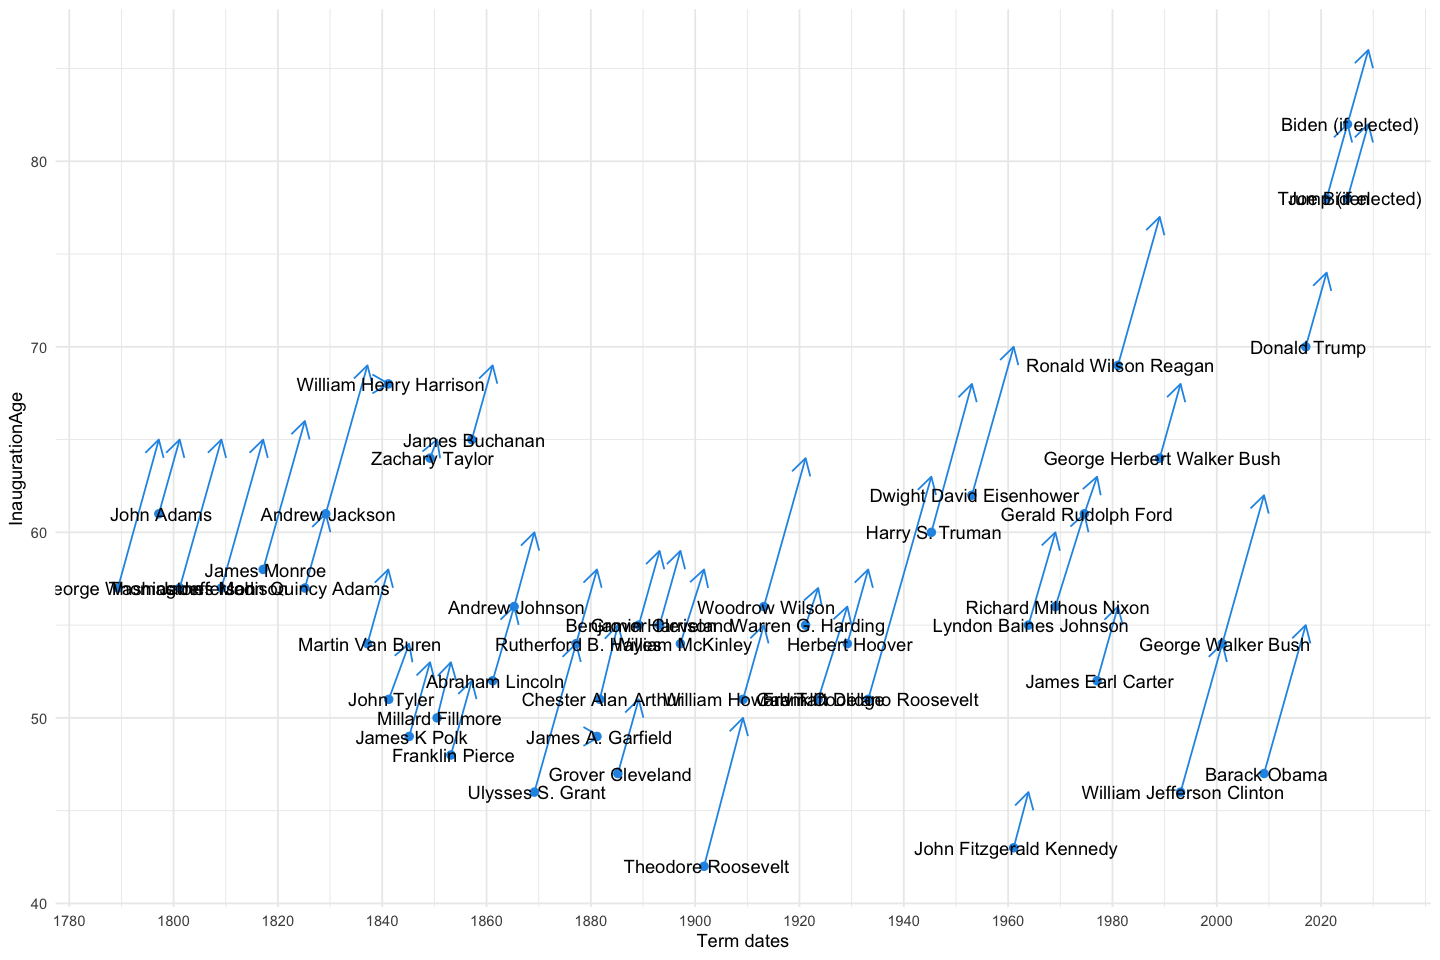

In [11]:
ggplot(ps, aes(x = TermBegin, y = InaugurationAge)) +
    geom_segment(aes(xend = TermEnd, 
                    yend = EndTermAge),
                arrow = arrow(length = unit(0.4, "cm")),
                color = 4) +
    geom_point(size = 2, color = 4) +
    geom_text(aes(label = Name)) +
    scale_x_date(name="Term dates",breaks=seq(as.Date("1780-01-01"),as.Date("2030-01-01"),by="20 year"), date_labels = "%Y")+
    theme_minimal()
  

In [13]:
# save chart

p <- ggplot(ps, aes(x = TermBegin, y = InaugurationAge)) +
    geom_segment(aes(xend = TermEnd, 
                    yend = EndTermAge),
                arrow = arrow(length = unit(0.4, "cm")),
                color = 4) +
    geom_point(size = 2, color = 4) +
    geom_text(aes(label = Name)) +
    scale_x_date(name="Term dates",breaks=seq(as.Date("1780-01-01"),as.Date("2030-01-01"),by="20 year"), date_labels = "%Y")+
    theme_minimal()


ggsave(file="presidents.svg", plot=p, width=12, height=8)